In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression

In [9]:
X = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y = np.array([100, 200, 250, 400, 450, 550, 600, 800, 850, 950])

X = X.reshape(-1, 1)

In [31]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters = 100):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
            db = (2/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.bias * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [32]:
model = LinearRegression(lr=0.0001, n_iters=10000)

model.fit(X, y)

In [33]:
model.bias

0.0

In [34]:
model.weights

array([9.38961039])

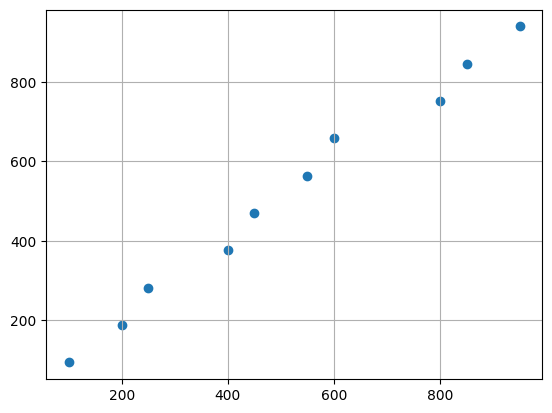

In [35]:
plt.scatter(y, model.predict(X))
plt.grid(True)
plt.show()

# Lasso

In [79]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

In [80]:
y = y.reshape(-1, 1)

In [70]:
X.shape

(442, 10)

In [102]:
class LassoRegression:
    def __init__(self, lr=0.01, n_iters=10000, l1_penalty=0.01):
        self.lr = lr
        self.n_iters = n_iters
        self.l1_penalty = l1_penalty
    
    def fit(self, X, y):
        self.m,self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X , self.weights) + self.bias
            dw = np.zeros(self.n)

            for j in range(self.n):
                if self.weights[j]>0:
                    dw[j] = (-2 * np.dot(X[:,j], (y-y_pred)) + self.l1_penalty)/self.m
                else:
                    dw[j] = (-2 * np.dot(X[:,j], (y-y_pred)) - self.l1_penalty)/self.m
            db = -2 * np.sum(y - y_pred) / self.m
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [103]:
model = LassoRegression()

model.fit(X, y.flatten())

In [104]:
y_pred = model.predict(X)

In [105]:
model.weights

array([  48.2261951 ,  -32.93251099,  258.87223352,  180.76736957,
         36.20986756,   10.71519156, -148.27211327,  133.85360587,
        229.47825861,  128.51835888])

In [107]:
model.bias

152.1334841628953

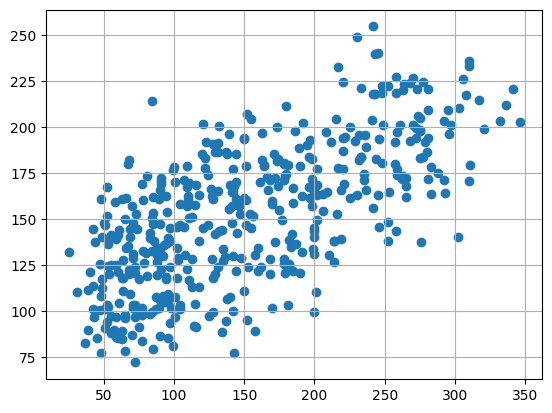

In [106]:
plt.scatter(y, y_pred)
plt.grid(True)
plt.show()